In [1]:
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt

# Define constants
rho = 1
c = 3.00*(10**8)
h_bar = (6.63*10**-34)/(2*np.pi)
epsilon = rho*(c**2)
m_N = (((1.6749*10**-27 * 6) + (1.6726*10**-27 * 6))/12)
m_e = (9.11*10**-31)
G = 6.67*10**-11

k_F_div1 = np.linspace(0.01, 1, 100) 
k_F_div2 = np.linspace(1.01, 10, 100)

k_F_div = k_F_div1.tolist() + k_F_div2.tolist()

k_Fs = np.array(k_F_div)*(m_e*c)

Densities = ((2*m_N)/(3*np.pi**2))*(k_Fs/h_bar)**3

print(Densities)

[1.96434380e+03 1.57147504e+04 5.30372826e+04 1.25718003e+05
 2.45542975e+05 4.24298261e+05 6.73769924e+05 1.00574403e+06
 1.43200663e+06 1.96434380e+06 2.61454160e+06 3.39438609e+06
 4.31566333e+06 5.39015939e+06 6.62966033e+06 8.04595221e+06
 9.65082109e+06 1.14560530e+07 1.34734341e+07 1.57147504e+07
 1.81917879e+07 2.09163328e+07 2.39001710e+07 2.71550887e+07
 3.06928719e+07 3.45253066e+07 3.86641790e+07 4.31212751e+07
 4.79083809e+07 5.30372826e+07 5.85197662e+07 6.43676176e+07
 7.05926232e+07 7.72065687e+07 8.42212404e+07 9.16484243e+07
 9.94999065e+07 1.07787473e+08 1.16522910e+08 1.25718003e+08
 1.35384539e+08 1.45534303e+08 1.56179083e+08 1.67330662e+08
 1.79000829e+08 1.91201368e+08 2.03944066e+08 2.17240710e+08
 2.31103084e+08 2.45542975e+08 2.60572169e+08 2.76202453e+08
 2.92445612e+08 3.09313432e+08 3.26817700e+08 3.44970201e+08
 3.63782721e+08 3.83267048e+08 4.03434965e+08 4.24298261e+08
 4.45868720e+08 4.68158129e+08 4.91178274e+08 5.14940941e+08
 5.39457916e+08 5.647409

In [2]:
# Integrate for pressure

def integrand_P(u):
    return (u**2 + 1)**(-1/2)*u**4

def integrate_P(x):
    I = sp.quad(integrand_P, 0, x)
    return I[0]*((m_e**4*c**5)/(3*np.pi**2*h_bar**3))

# For all k_F
    
def results_P(k_F):
    Results = []
    for i in range (0, len(k_F)):
        Results = Results + [integrate_P(k_F[i])]
    return Results
        
Pressures = np.array(results_P(k_F_div))

print(Pressures)

[9.62215364e+11 3.07875935e+13 2.33751565e+14 9.84781193e+14
 3.00434946e+15 7.47285374e+15 1.61443099e+16 3.14591961e+16
 5.66562848e+16 9.58833033e+16 1.54306272e+17 2.38217369e+17
 3.55141186e+17 5.13939224e+17 7.24912527e+17 9.99902302e+17
 1.35238843e+18 1.79758577e+18 2.35253812e+18 3.03620978e+18
 3.86957467e+18 4.87570282e+18 6.07984427e+18 7.50951031e+18
 9.19455198e+18 1.11672358e+19 1.34623166e+19 1.61171080e+19
 1.91715494e+19 2.26682704e+19 2.66526527e+19 3.11728891e+19
 3.62800390e+19 4.20280820e+19 4.84739685e+19 5.56776674e+19
 6.37022111e+19 7.26137382e+19 8.24815333e+19 9.33780647e+19
 1.05379019e+20 1.18563333e+20 1.33013227e+20 1.48814228e+20
 1.66055198e+20 1.84828359e+20 2.05229313e+20 2.27357060e+20
 2.51314018e+20 2.77206040e+20 3.05142422e+20 3.35235924e+20
 3.67602774e+20 4.02362680e+20 4.39638838e+20 4.79557937e+20
 5.22250166e+20 5.67849215e+20 6.16492282e+20 6.68320071e+20
 7.23476792e+20 7.82110164e+20 8.44371413e+20 9.10415266e+20
 9.80399952e+20 1.054487

In [3]:
# Integrate for energy density

def integrand_E(u):
    return (u**2 + 1)**(1/2)*u**2

def integrate_E(x):
    I = sp.quad(integrand_E, 0, x)
    return I[0]*((m_e**4*c**5)/(np.pi**2*h_bar**3))

# For all k_F
    
def results_E(k_F):
    Results = []
    for i in range (0, len(k_F)):
        Results = Results + [integrate_E(k_F[i])]
    return Results

E_D = results_E(k_F_div)

E_Densities = np.array(E_D + Densities*c**2)

print(E_Densities)

[1.76839056e+20 1.41471248e+21 4.77465482e+21 1.13177010e+22
 2.21048863e+22 3.81972470e+22 6.06558199e+22 9.05416432e+22
 1.28915756e+23 1.76839199e+23 2.35373014e+23 3.05578244e+23
 3.88515937e+23 4.85247139e+23 5.96832901e+23 7.24334274e+23
 8.68812314e+23 1.03132808e+24 1.21294263e+24 1.41471702e+24
 1.63771233e+24 1.88298963e+24 2.15160998e+24 2.44463447e+24
 2.76312417e+24 3.10814017e+24 3.48074356e+24 3.88199543e+24
 4.31295688e+24 4.77468900e+24 5.26825291e+24 5.79470972e+24
 6.35512053e+24 6.95054648e+24 7.58204869e+24 8.25068828e+24
 8.95752639e+24 9.70362417e+24 1.04900428e+25 1.13178433e+25
 1.21880870e+25 1.31018349e+25 1.40601484e+25 1.50640884e+25
 1.61147162e+25 1.72130931e+25 1.83602801e+25 1.95573386e+25
 2.08053296e+25 2.21053145e+25 2.34583544e+25 2.48655105e+25
 2.63278442e+25 2.78464165e+25 2.94222889e+25 3.10565225e+25
 3.27501786e+25 3.45043184e+25 3.63200033e+25 3.81982946e+25
 4.01402534e+25 4.21469411e+25 4.42194191e+25 4.63587486e+25
 4.85659909e+25 5.084220

[1.39735203e+12 4.73812288e+09]


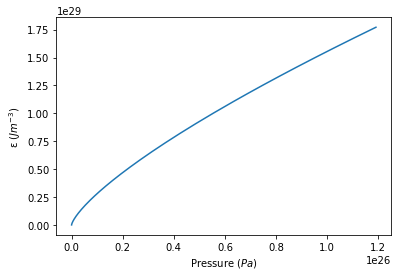

In [10]:
# Plot
from scipy.optimize import curve_fit


def func(x, a, b):
    return a*x**(3/5) + b*x**(3/4)

plt.plot(Pressures, E_Densities)

plt.xlabel("Pressure ($Pa$)")
plt.ylabel("ε ($J m^{-3}$)")

popt, pcov = curve_fit(func, Pressures, E_Densities, p0 = [10**14, 10**9])

print(popt)

A_NR, A_R = popt

plt.savefig('ε v Pressure Numerical.png')

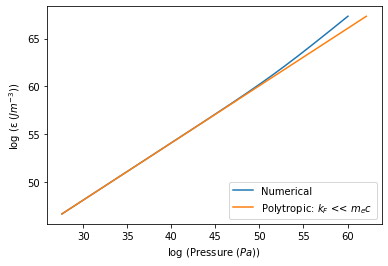

In [5]:
k_F_old = np.linspace(0.01, 10, 40)*m_e*c
k_F2_old = np.linspace(0.01, 10, 40)*m_e*c

E_Densities_old = (((2*m_N)/(3*np.pi**2))*(k_F_old/h_bar)**3)*c**2
E_Densities2_old = (((2*m_N)/(3*np.pi**2))*(k_F2_old/h_bar)**3)*c**2

Pressures_old = (((h_bar**2)/(15*((np.pi**2)*m_e)))*(((3/2)*(np.pi**2))/(m_N*(c**2)))**(5/3))*E_Densities_old**(5/3)
Pressures2_old = (((h_bar*c)/(12*(np.pi**2)))*(((3/2)*(np.pi**2))/(m_N*(c**2)))**(4/3))*E_Densities2_old**(4/3)

plt.plot(np.log(Pressures), np.log(E_Densities), label = 'Numerical')
plt.plot(np.log(Pressures_old), np.log(E_Densities_old), label = 'Polytropic: $k_{F}$ << $m_{e} c$')

plt.xlabel("log (Pressure ($Pa$))")
plt.ylabel("log (ε ($J m^{-3}$))")
plt.legend(loc = 'lower right')
plt.savefig('ε v Pressure Non-Rel.png')

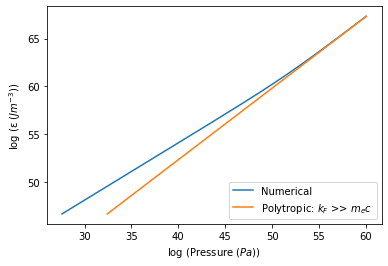

In [6]:
plt.plot(np.log(Pressures), np.log(E_Densities), label = 'Numerical')
plt.plot(np.log(Pressures2_old), np.log(E_Densities2_old), label = 'Polytropic: $k_{F}$ >> $m_{e} c$')

plt.xlabel("log (Pressure ($Pa$))")
plt.ylabel("log (ε ($J m^{-3}$))")
plt.legend(loc = 'lower right')
plt.savefig('ε v Pressure Rel.png')

In [16]:
def dM_dr(P, m, r):
    dMdr = (4*np.pi*r**2*(A_NR*P**(3/5) + A_R*P**(3/4)))/(c**2)
    return dMdr

def dP_dr(P, m, r):
    dPdr = -(G*(A_NR*P**(3/5) + A_R*P**(3/4))*m)/(c**2*r**2)
    return dPdr

def integrate(P, m):
    end = False
    r = 1
    step = 1000
    Masses = []
    Pressures = []
    Radii = []
    while end == False:
        slope_m = dM_dr(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr(P, m, r)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        Radii = Radii + [r]
        r = r + step
    print (m)
    return Masses, Pressures, Radii

1.9465814354004223e+30


Text(0, 0.5, 'Enclosed Mass ($kg$)')

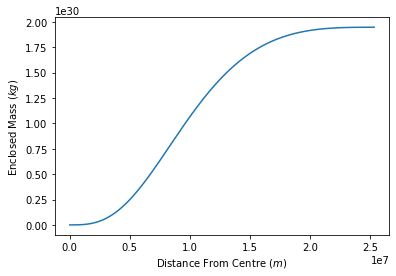

In [38]:
Int_mass, Int_pressure, Int_radius = integrate(2.118*10**21, 0)

plt.plot(Int_radius, Int_mass)

plt.xlabel("Distance From Centre ($m$)")
plt.ylabel("Enclosed Mass ($kg$)")

Text(0, 0.5, 'Pressure ($Pa$)')

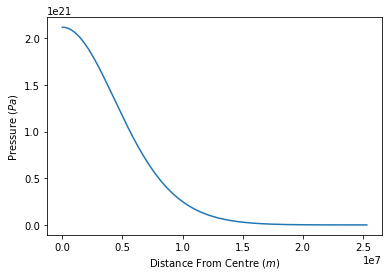

In [36]:
plt.plot(Int_radius, Int_pressure)

plt.xlabel("Distance From Centre ($m$)")
plt.ylabel("Pressure ($Pa$)")

In [25]:
K_rel = ((h_bar*c)/(12*(np.pi**2)))*(((3/2)*(np.pi**2))/(m_N*(c**2)))**(4/3)
K_nrel = ((h_bar**2)/(15*((np.pi**2)*m_e)))*(((3/2)*(np.pi**2))/(m_N*(c**2)))**(5/3)

def dM_dr_rel(P, m, r):
    dMdr = 4*np.pi*r**2*P**(3/4)/(c**2*K_rel**(3/4))
    return dMdr

def dP_dr_rel(P, m, r):
    dPdr = -G*m*P**(3/4)/(c**2*r**2*K_rel**(3/4))
    return dPdr

def integrate_rel(P, m):
    end = False
    r = 1
    step = 1000
    Masses = []
    Pressures = []
    Radii = []
    while end == False:
        slope_m = dM_dr_rel(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr_rel(P, m, r)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        Radii = Radii + [r]
        r = r + step
    print (m)
    return Masses, Pressures, Radii

2.8575828600594197e+30


Text(0, 0.5, 'Enclosed Mass ($kg$)')

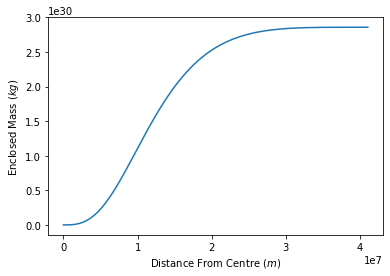

In [34]:
Int_mass_rel, Int_pressure_rel, Int_radius_rel = integrate_rel(2.118*10**21, 0)

plt.plot(Int_radius_rel, Int_mass_rel)

plt.xlabel("Distance From Centre ($m$)")
plt.ylabel("Enclosed Mass ($kg$)")

Text(0, 0.5, 'Pressure ($Pa$)')

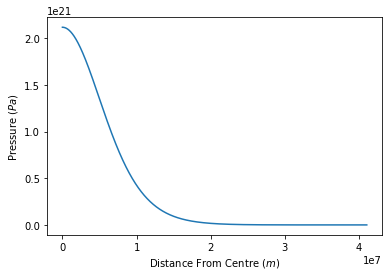

In [32]:
plt.plot(Int_radius_rel, Int_pressure_rel)

plt.xlabel("Distance From Centre ($m$)")
plt.ylabel("Pressure ($Pa$)")

In [26]:
def dM_dr_nrel(P, m, r):
    dMdr = 4*np.pi*r**2*P**(3/5)/(c**2*K_nrel**(3/5))
    return dMdr

def dP_dr_nrel(P, m, r):
    dPdr = -G*m*P**(3/5)/(c**2*r**2*K_nrel**(3/5))
    return dPdr

def integrate_nrel(P, m):
    end = False
    r = 1
    step = 1000
    Masses = []
    Pressures = []
    Radii = []
    while end == False:
        slope_m = dM_dr_nrel(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr_nrel(P, m, r)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        Radii = Radii + [r]
        r = r + step
    print (m)
    return Masses, Pressures, Radii

8.624946152484531e+29


Text(0, 0.5, 'Enclosed Mass ($kg$)')

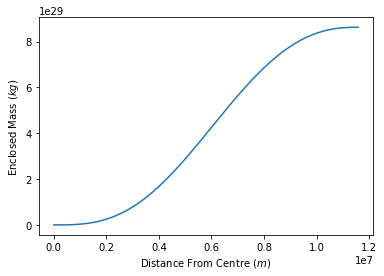

In [35]:
Int_mass_nrel, Int_pressure_nrel, Int_radius_nrel = integrate_nrel(2.118*10**21, 0)

plt.plot(Int_radius_nrel, Int_mass_nrel)

plt.xlabel("Distance From Centre ($m$)")
plt.ylabel("Enclosed Mass ($kg$)")

Text(0, 0.5, 'Pressure ($Pa$)')

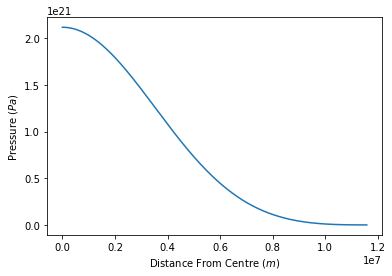

In [33]:
plt.plot(Int_radius_nrel, Int_pressure_nrel)

plt.xlabel("Distance From Centre ($m$)")
plt.ylabel("Pressure ($Pa$)")